# Donation Game More Memory

**Imports**

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
import glob

In [6]:
plt.rcParams["font.weight"] = "normal"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 11

plt.rcParams["font.family"] = "Arial"

In [8]:
cmaps = [matplotlib.colormaps.get_cmap("Blues"),
         matplotlib.colormaps.get_cmap("Reds"),
         matplotlib.colormaps.get_cmap("Greens"), 
         matplotlib.colormaps.get_cmap("Purples"),
         matplotlib.colormaps.get_cmap("Oranges")]

### Heatmaps for SI

**Two interactions and Two opponents**

In [9]:
two_opponents_files = [f"../to_archieve/clean_two_opponents_benefit_{b}.csv" for b in [3, 10]]

two_op_dfs = [pd.read_csv(file) for file in two_opponents_files]

In [10]:
heatmaps = []
extents = []

    
for df in two_op_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

In [11]:
min_, max_ = (1.0, 1391629.0)

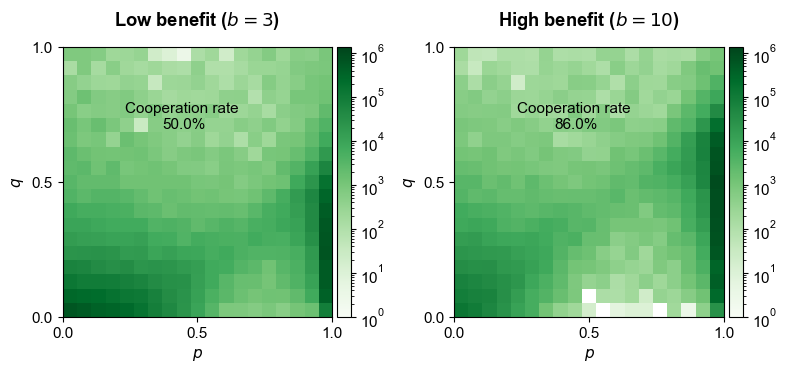

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in two_op_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[1]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[2],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 3))
    axes[index].set_yticks(np.linspace(0, 1, 3));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")

    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                     horizontalalignment='center')



axes[0].set_title(r"Low benefit ($b=3$)", weight="bold", y=1.05);

axes[1].set_title(r"High benefit ($b=10$)", weight="bold", y=1.05);


fig.tight_layout();

# fig.savefig("../static/two_interactions_donation_game.pdf", bbox_inches='tight')

In [14]:
two_rounds_files = [f"../to_archieve/clean_two_rounds_benefit_{b}.csv" for b in [3, 10]]

two_rounds_dfs = [pd.read_csv(file) for file in two_rounds_files]

In [15]:
heatmaps = []
extents = []

    
for df in two_rounds_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

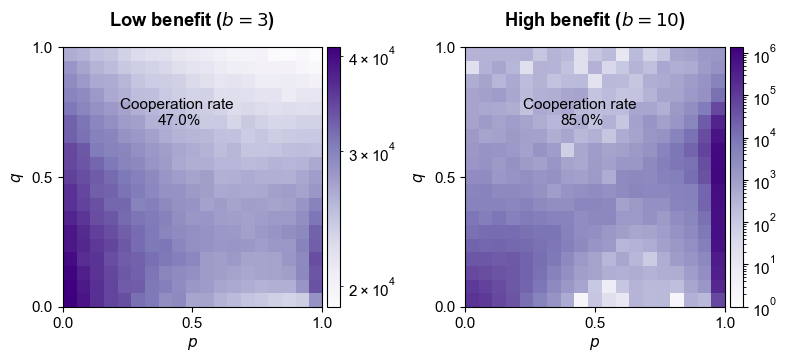

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in two_rounds_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[1]]):
    
    index = (i % 2)
    
    if i == 1:
        im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                                cmap=cmaps[3],
                                norm=colors.LogNorm(vmin=min_, vmax=max_))
    else:
        im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                                cmap=cmaps[3],
                                norm=colors.LogNorm())       

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 3))
    axes[index].set_yticks(np.linspace(0, 1, 3));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")
    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                     horizontalalignment='center')


axes[0].set_title(r"Low benefit ($b=3$)", weight="bold", y=1.05);
axes[1].set_title(r"High benefit ($b=10$)", weight="bold", y=1.05);


fig.tight_layout();

# 3

### Combining two rounds opponents data sets

In [17]:
two_rounds_opponents_files = [f"../to_archieve/clean_two_rounds_opponents_benefit_{b}.csv" for b in [3, 10]]

two_rounds_opponents_dfs = [pd.read_csv(file) for file in two_rounds_opponents_files]

In [18]:
heatmaps = []
extents = []

    
for df in two_rounds_opponents_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

In [19]:
min_, max_ = (1.0, 1391629.0)

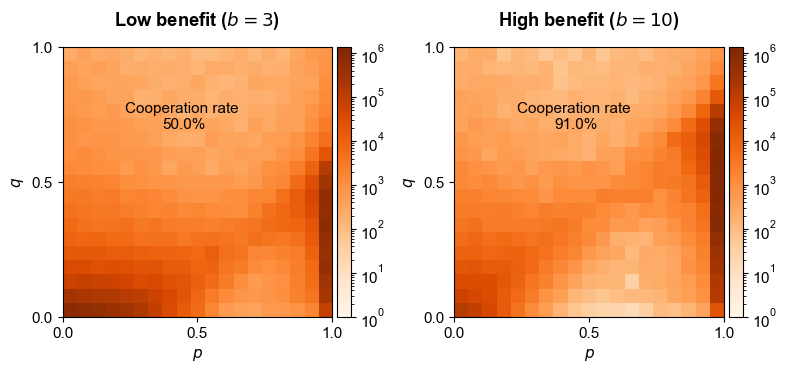

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in two_rounds_opponents_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[1]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[4],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 3))
    axes[index].set_yticks(np.linspace(0, 1, 3));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")
    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                     horizontalalignment='center')


axes[0].set_title(r"Low benefit ($b=3$)", weight="bold", y=1.05);
axes[1].set_title(r"High benefit ($b=10$)", weight="bold", y=1.05);


fig.tight_layout();

# fig.savefig("../static/two_rounds_opponents_donation_game.pdf", bbox_inches='tight')

### Heat maps in one Plot

In [21]:
high_benefit_files = [
         "../to_archieve/perfect_memory/clean_c_1_b_10_stochastic_0.csv",
         "../to_archieve/limited_memory/clean_last_round_b_10.csv",
         "../to_archieve/clean_two_opponents_benefit_10.csv",
         "../to_archieve/clean_two_rounds_benefit_10.csv",
         "../to_archieve/clean_two_rounds_opponents_benefit_10.csv"]

In [24]:
heatmaps = []

extents = []

dfs = []

    
for file in high_benefit_files:
    df = pd.read_csv(file)
    if file == "../to_archieve/limited_memory/clean_last_round_b_10.csv":
        df = df[df.index < 54141]
    dfs.append(df)
    

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

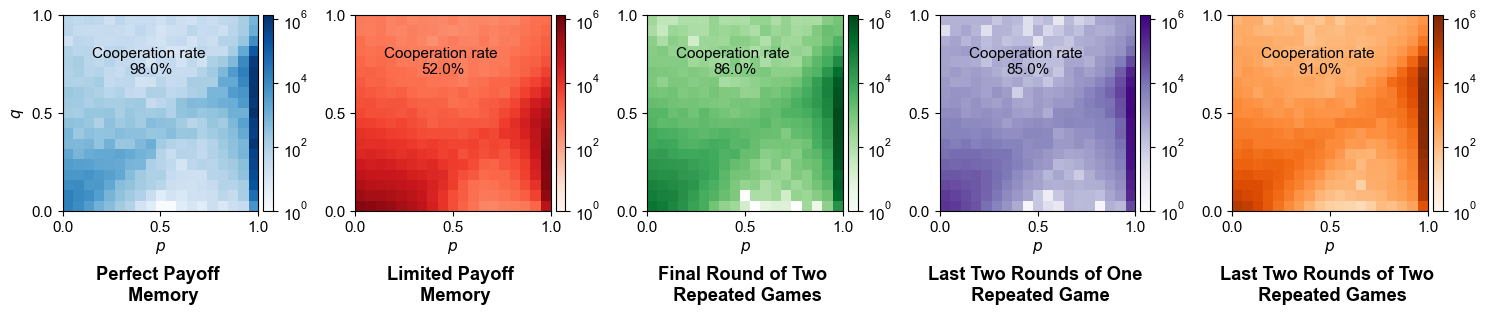

In [40]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(15, 10))


cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))), 2) 
                     for df in dfs]

for i, heatmap in enumerate(heatmaps):
    
    index = (i % 5)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[i],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 3))
    axes[index].set_yticks(np.linspace(0, 1, 3));
    axes[index].set_xlabel("$p$")

    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(round(cooperation_rates[i] * 100, 2)) + '%',
                     horizontalalignment='center')

axes[0].set_ylabel("$q$")

axes[0].set_title("Perfect Payoff \n Memory", weight="bold", y=-.5);
axes[1].set_title("Limited Payoff \n Memory", weight="bold", y=-.5);
axes[2].set_title("Final Round of Two \n Repeated Games", weight="bold", y=-.5);
axes[3].set_title("Last Two Rounds of One \n Repeated Game", weight="bold", y=-.5);
axes[4].set_title("Last Two Rounds of Two \n Repeated Games", weight="bold", y=-.5);




fig.tight_layout();

fig.savefig("../paper/static/more_memory_heatmaps_donation_game.pdf", bbox_inches='tight')

### Cooperation Rates Bar plots

In [41]:
titles = ["Perfect Payoff \n Memory",
          "Limited Payoff \n Memory",
          "Final Round of Two \n Repeated Games",
          "Last Two Rounds of One \n Repeated Game",
          "Last Two Rounds of Two \n Repeated Games"]

In [42]:
low_benefit_files = [
         "../to_archieve/perfect_memory/clean_c_1_b_3_stochastic_0.csv",
         "../to_archieve/limited_memory/clean_last_round_b_3.csv",
         "../to_archieve/clean_two_opponents_benefit_3.csv",
         "../to_archieve/clean_two_rounds_benefit_3.csv",
         "../to_archieve/clean_two_rounds_opponents_benefit_3.csv"]

In [43]:
low_dfs = [pd.read_csv(file) for file in low_benefit_files]

In [45]:
high_dfs = [pd.read_csv(file) for file in high_benefit_files]

In [44]:
bar_colors = [cmap(0.9) for cmap in cmaps]

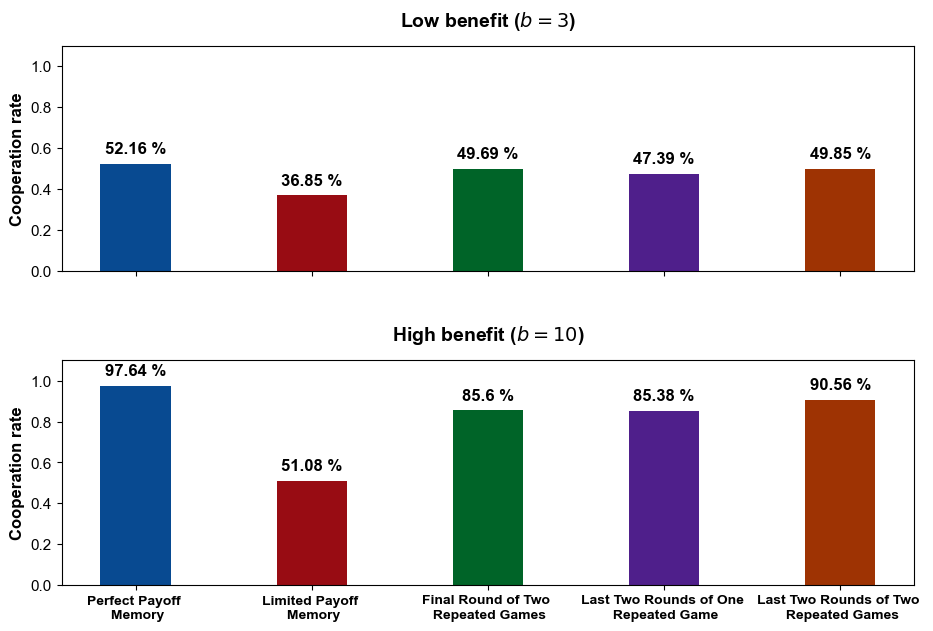

In [72]:
fig, axes = plt.subplots(nrows=2, figsize=(11, 7));

height_low = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies'])))
          for df in low_dfs]

height_high = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) 
          for df in high_dfs]

x_pos = np.arange(len(titles))

axes[0].bar(x_pos, height_low, width=0.4, color=bar_colors);

axes[1].bar(x_pos, height_high, width=0.4, color=bar_colors);

for ax in axes:
    ax.set_ylabel("Cooperation rate", weight="bold", fontsize=12);
    ax.set_ylim(0, 1.1);
    ax.set_xticks([0, 1, 2, 3, 4]);
    
axes[0].set_xticklabels(["" for _ in range(5)], fontsize=10);
axes[1].set_xticklabels(titles,
                        fontsize=10,
                        weight="bold");

axes[0].set_title("Low benefit ($b = 3$)", fontweight='bold', fontsize=14, y=1.05);
axes[1].set_title("High benefit ($b = 10$)", fontweight='bold', fontsize=14, y=1.05);


for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes[0].text(pos,
          height_low[j] + 0.05,
          f"{round(height_low[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )
for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes[1].text(pos,
          height_high[j] + 0.05,
          f"{round(height_high[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )
plt.subplots_adjust(hspace=.4)
    
plt.savefig("../paper/static/cooperation_rates_for_low_benefit.pdf", bbox_inches='tight')

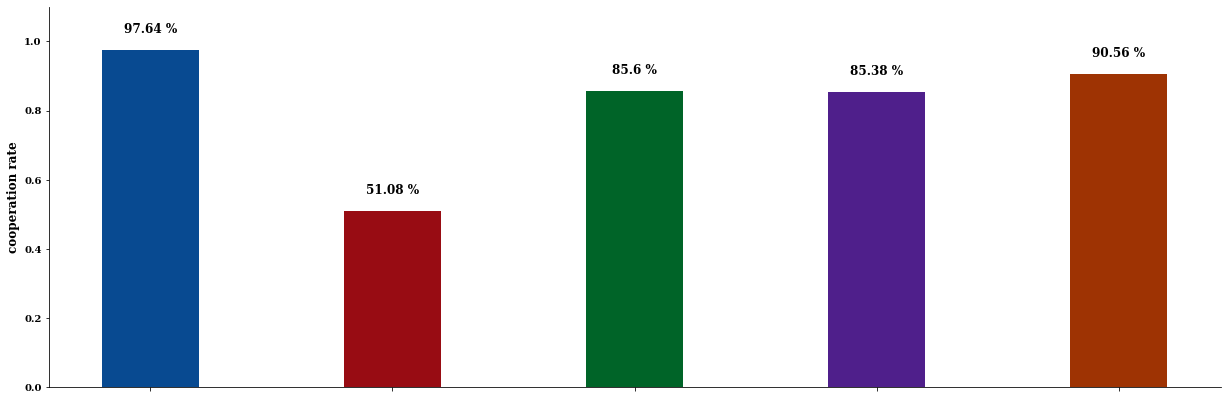

In [21]:
fig, axes = plt.subplots(figsize=(21, 7));

height = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) 
          for df in high_dfs]

x_pos = np.arange(len(titles))

axes.bar(x_pos, height, width=0.4, color=bar_colors);

axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

axes.set_ylim(0, 1.1);
axes.set_xticks([0, 1, 2, 3, 4]);
axes.set_xticklabels(["" for _ in range(5)], fontsize=10);

for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes.text(pos,
          height[j] + 0.05,
          f"{round(height[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )

    
    
for ax in [axes.spines["right"], axes.spines["top"]]:
    ax.set_visible(False);

    
plt.savefig("../paper/static/cooperation_rates_for_high_benefit.pdf", bbox_inches='tight')

In [33]:
from scipy.stats import mannwhitneyu

In [34]:
cooperation_dist = [df['average cooperation rate'] * (df['frequencies']) for df in high_dfs]

In [39]:
# compare samples
stat, p = mannwhitneyu(cooperation_dist[1], cooperation_dist[4])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=2952474016.500, p=0.000
Different distribution (reject H0)
